<a href="https://colab.research.google.com/github/Diane10/ML/blob/master/Copy_of_customerchun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install -U ipykernel

     |████████████████████████████████| 122kB 5.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [25]:
!pip install streamlit

     |████████████████████████████████| 7.4MB 7.4MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 112kB 34.5MB/s 
     |████████████████████████████████| 163kB 48.1MB/s 
     |████████████████████████████████| 4.4MB 47.3MB/s 
     |████████████████████████████████| 6.7MB 45.2MB/s 
     |████████████████████████████████| 133kB 53.9MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=3ce7e2ed9ce99b5b080d0f8f07f636c3de2f40897d2b32e9d764d61bf9fbe1db
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=9451884eba83d4d0b2e6fa84466f3fa0344232e49ae015b08df997ce231b9779
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0

In [26]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.2.2-cp36-none-any.whl size=18025 sha256=c33d729fcb5565ae56e8215d30851565cc2f8a32dc78e347d684bc3e44719df0
  Stored in directory: /root/.cache/pip/wheels/9c/d3/b5/502fbef4b2782a6142bc00c62ccde76ee04c9148fb43b1b2cd
Successfully built pyngrok


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import auc

In [2]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/Diane10/ML/master/Customer-Churn.csv')
print(data.head())

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...         29.850       29.850     No
1  5575-GNVDE    Male              0  ...         56.950     1889.500     No
2  3668-QPYBK    Male              0  ...         53.850      108.150    Yes
3  7795-CFOCW    Male              0  ...         42.300     1840.750     No
4  9237-HQITU  Female              0  ...         70.700      151.650    Yes

[5 rows x 21 columns]


In [4]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['MultipleLines',
 'OnlineBackup',
 'StreamingMovies',
 'TechSupport',
 'Partner',
 'DeviceProtection',
 'InternetService',
 'Dependents',
 'PhoneService',
 'PaymentMethod',
 'Contract',
 'OnlineSecurity',
 'StreamingTV',
 'customerID',
 'Churn',
 'PaperlessBilling',
 'gender']

In [6]:
newdata= data.drop(['TotalCharges'],axis=1)

In [7]:
le=LabelEncoder()
newdata['gender']=le.fit_transform(newdata['gender'])
newdata['Dependents']=le.fit_transform(newdata['Dependents'])
newdata['PhoneService']=le.fit_transform(newdata['PhoneService'])
newdata['InternetService']=le.fit_transform(newdata['InternetService'])
newdata['OnlineSecurity']=le.fit_transform(newdata['OnlineSecurity'])
newdata['OnlineBackup']=le.fit_transform(newdata['OnlineBackup'])
newdata['TechSupport']=le.fit_transform(newdata['TechSupport'])
newdata['PaymentMethod']=le.fit_transform(newdata['PaymentMethod'])
newdata['StreamingMovies']=le.fit_transform(newdata['StreamingMovies'])
newdata['PaperlessBilling']=le.fit_transform(newdata['PaperlessBilling'])
newdata['Partner']=le.fit_transform(newdata['Partner'])
newdata['DeviceProtection']=le.fit_transform(newdata['DeviceProtection'])
newdata['StreamingTV']=le.fit_transform(newdata['StreamingTV'])
newdata['customerID']=le.fit_transform(newdata['customerID'])
newdata['Contract']=le.fit_transform(newdata['Contract'])
newdata['MultipleLines']=le.fit_transform(newdata['MultipleLines'])
newdata['Churn']=le.fit_transform(newdata['Churn'])

In [8]:
numerical_feature_columns = list(newdata._get_numeric_data().columns)
numerical_feature_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']

In [19]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Churn'],name='Actual')))
    return 1

In [10]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [11]:
target = 'Churn'

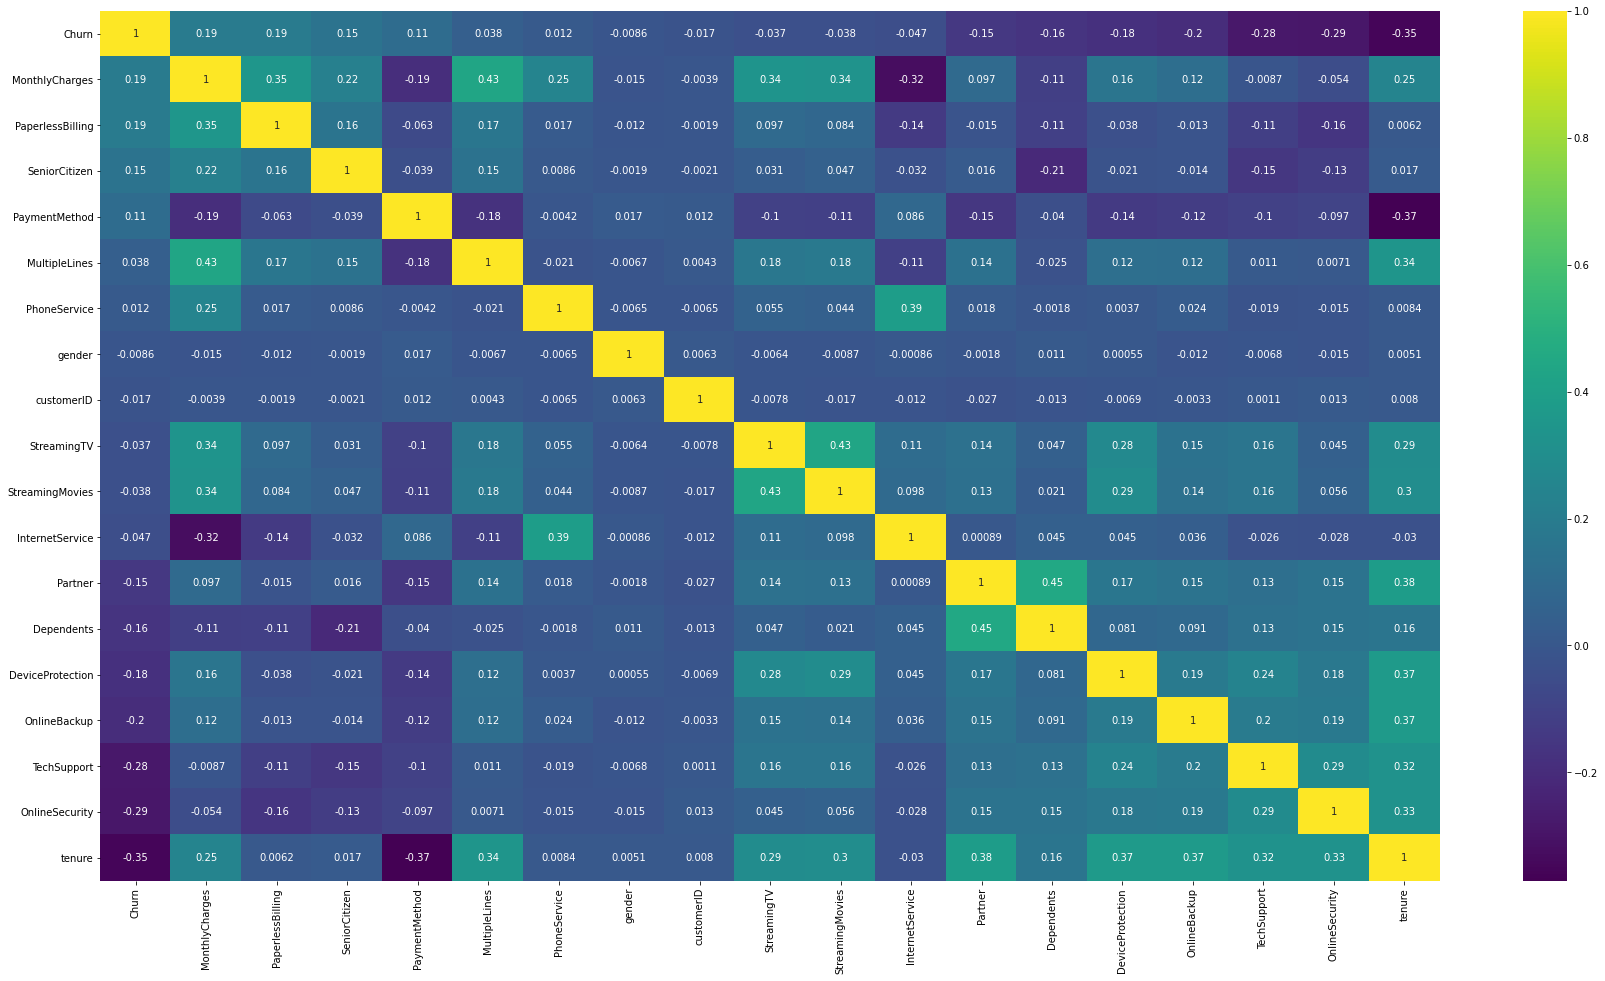

In [12]:
k = 19 #number of variables for heatmap
cols = newdata[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = newdata[cols].corr()
plt.figure(figsize=(30,16))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [13]:
X = newdata.loc[:, newdata.columns != target]
Y = newdata.loc[:, newdata.columns == target]

In [14]:
X.shape

(7043, 19)

In [15]:
Y.shape

(7043, 1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [17]:
model= xgb.XGBClassifier(n_estimators=100,seed=30)
model.fit(x_train,y_train)        

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30,
              silent=None, subsample=1, verbosity=1)

In [20]:
generate_accuracy_and_heatmap(model, x_test, y_test)

Accuracy is:  0.7926881720430108
F1 score is:  0.5673249551166966


Actual       0    1
Predicted          
0          444  162
1          143   28


1

In [21]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [22]:

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
5,tenure,11075.091
0,customerID,3587.727
18,MonthlyCharges,2409.203
15,Contract,748.966
9,OnlineSecurity,373.174
12,TechSupport,364.562
10,OnlineBackup,139.653
11,DeviceProtection,132.196
4,Dependents,90.263
2,SeniorCitizen,84.656


In [51]:
%%writefile app.py

import streamlit as st 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,plot_roc_curve,precision_score,recall_score,precision_recall_curve,roc_auc_score,auc
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


data=pd.read_csv('https://raw.githubusercontent.com/Diane10/ML/master/Customer-Churn.csv')

#fetuare extracting
#q1 Using the given dataset extract the relevant features that can define a customer churn. [5]
cols=['tenure','MonthlyCharges','Contract','OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','Churn']
newdata=data[cols]
target = 'Churn'
le=LabelEncoder()
newdata['Contract']=le.fit_transform(newdata['Contract'])
newdata['OnlineSecurity']=le.fit_transform(newdata['OnlineSecurity'])
newdata['TechSupport']=le.fit_transform(newdata['TechSupport'])
newdata['OnlineBackup']=le.fit_transform(newdata['OnlineBackup'])
newdata['DeviceProtection']=le.fit_transform(newdata['DeviceProtection'])
newdata['Churn']=le.fit_transform(newdata['Churn'])

X = newdata.loc[:, newdata.columns != target]
Y = newdata.loc[:, newdata.columns == target]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
X_trained= sl.fit_transform(X_train)
X_tested= sl.fit_transform(X_test)

class_name=['yes','no']
st.title("Machine Learning Assignment")
html_temp = """
    <div style="background-color:#025246 ;padding:10px">
    <h2 style="color:white;text-align:center;">Custormer Churn Prediction ML App </h2>
    </div>
    """
st.markdown(html_temp, unsafe_allow_html=True)

st.markdown("""
Machine Learning models which predict potential of customer to churn
""")
st.sidebar.title('Customer churn Prediction')

st.sidebar.markdown("""
Machine Learning models which predict potential customer to churn
""")


if st.sidebar.checkbox("show raw data",False):
    st.subheader("Customer Churn for classification")
    st.write(data)
if st.sidebar.checkbox("Show Selected Feature"):
    st.write(newdata)
if st.sidebar.checkbox("Show a Statistical Analysis"):
	st.write(newdata.describe())
if st.sidebar.checkbox("Show a corration"):
	st.write(newdata.corr()) 


st.sidebar.subheader('Visualization')
if st.sidebar.checkbox("Pair plot",False):
  k = 19 #number of variables for heatmap
  cols = newdata.corr().nlargest(k, target)[target].index
  cm = newdata[cols].corr()
  fig= plt.figure(figsize=(30,16))
  st.pyplot(fig, use_container_width=True)

if st.sidebar.checkbox("Graph plot",False):
   fig.add_trace(go.Scatter(x=newdata.Churn, y=newdata.MonthlyCharges))
   st.pyplot(fig, use_container_width=True)


st.sidebar.subheader('Choose Classifer')
classifier_name = st.sidebar.selectbox(
    'Choose classifier',
    ('KNN', 'SVM', 'Random Forest','Logistic Regression','XGBOOST')
)
if classifier_name == 'SVM':
    st.sidebar.subheader('Model Hyperparmeter')
    c= st.sidebar.number_input("c(Reguralization)",0.01,10.0,step=0.01,key='c')
    kernel= st.sidebar.radio("kernel",("linear","rbf"),key='kernel')
    gamma= st.sidebar.radio("gamma(kernel coefficiency",("scale","auto"),key='gamma')

    metrics= st.sidebar.multiselect("What is the metrics to plot?",('confusion matrix','roc_curve','precision_recall_curve'))

    if st.sidebar.button("classify",key='classify'):
        st.subheader("SVM result")
        svcclassifier= SVC(C=c,kernel=kernel,gamma=gamma)
        svcclassifier.fit(X_trained,y_train)
        y_pred= svcclassifier.predict(X_tested)
        acc= accuracy_score(y_test,y_pred)
        st.write("Accuracy:",acc.round(2))
        st.write("precision_score:",precision_score(y_test,y_pred,labels=class_name).round(2))
        st.write("recall_score:",recall_score(y_test,y_pred,labels=class_name).round(2))
        if 'confusion matrix' in metrics:
            st.subheader('confusion matrix')
            plot_confusion_matrix(svcclassifier,X_tested,y_test,display_labels=class_name)
            st.pyplot()
        if 'roc_curve' in metrics:
            st.subheader('plot_roc_curve')
            plot_roc_curve(svcclassifier,X_tested,y_test)
            st.pyplot()
        if 'precision_recall_curve' in metrics:
            st.subheader('precision_recall_curve')
            plot_roc_curve(svcclassifier,X_tested,y_test)
            st.pyplot()
        


if classifier_name == 'Logistic Regression':
    st.sidebar.subheader('Model Hyperparmeter')
    c= st.sidebar.number_input("c(Reguralization)",0.01,10.0,step=0.01,key='Logistic')
    max_iter= st.sidebar.slider("maximum number of iteration",100,500,key='max_item')
   

    metrics= st.sidebar.multiselect("What is the metrics to plot?",('confusion matrix','roc_curve','precision_recall_curve'))

    if st.sidebar.button("classify",key='classify'):
        st.subheader("Logistic Regression result")
        Regression= LogisticRegression(C=c,max_iter=max_iter)
        Regression.fit(X_trained,y_train)
        y_prediction= Regression.predict(X_tested)
        acc= accuracy_score(y_test,y_prediction)
        st.write("Accuracy:",acc.round(2))
        st.write("precision_score:",precision_score(y_test,y_prediction,labels=class_name).round(2))
        st.write("recall_score:",recall_score(y_test,y_prediction,labels=class_name).round(2))
        if 'confusion matrix' in metrics:
            st.subheader('confusion matrix')
            plot_confusion_matrix(Regression,X_tested,y_test,display_labels=class_name)
            st.pyplot()
        if 'roc_curve' in metrics:
            st.subheader('plot_roc_curve')
            plot_roc_curve(Regression,X_tested,y_test)
            st.pyplot()
        if 'precision_recall_curve' in metrics:
            st.subheader('precision_recall_curve')
            plot_roc_curve(Regression,X_tested,y_test)
            st.pyplot()
        
            

if classifier_name == 'Random Forest':
    st.sidebar.subheader('Model Hyperparmeter')
    n_estimators= st.sidebar.number_input("Number of trees in the forest",100,5000,step=10,key='estimators')
    max_depth= st.sidebar.number_input("maximum depth of tree",1,20,step=1,key='max_depth')
    bootstrap= st.sidebar.radio("Boostrap sample when building trees",("True","False"),key='boostrap')


    metrics= st.sidebar.multiselect("What is the metrics to plot?",('confusion matrix','roc_curve','precision_recall_curve'))

    if st.sidebar.button("classify",key='classify'):
        st.subheader("Random Forest result")
        model= RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,bootstrap=bootstrap)
        model.fit(X_trained,y_train)
        y_prediction= model.predict(X_tested)
        acc= accuracy_score(y_test,y_prediction)
        st.write("Accuracy:",acc.round(2))
        st.write("precision_score:",precision_score(y_test,y_prediction,labels=class_name).round(2))
        st.write("recall_score:",recall_score(y_test,y_prediction,labels=class_name).round(2))
        if 'confusion matrix' in metrics:
            st.subheader('confusion matrix')
            plot_confusion_matrix(model,X_tested,y_test,display_labels=class_name)
            st.pyplot()
        if 'roc_curve' in metrics:
            st.subheader('plot_roc_curve')
            plot_roc_curve(model,X_tested,y_test)
            st.pyplot()
        if 'precision_recall_curve' in metrics:
            st.subheader('precision_recall_curve')
            plot_roc_curve(model,X_tested,y_test)
            st.pyplot() 


if classifier_name == 'KNN':
    st.sidebar.subheader('Model Hyperparmeter')
    n_neighbors= st.sidebar.number_input("Number of n_neighbors",5,30,step=1,key='neighbors')
    leaf_size= st.sidebar.slider("leaf size",30,200,key='leaf')
    weights= st.sidebar.radio("weight function used in prediction",("uniform","distance"),key='weight')


    metrics= st.sidebar.multiselect("What is the metrics to plot?",('confusion matrix','roc_curve','precision_recall_curve'))

    if st.sidebar.button("classify",key='classify'):
        st.subheader("KNN result")
        model= KNeighborsClassifier(n_neighbors=n_neighbors,leaf_size=leaf_size,weights=weights)
        model.fit(X_trained,y_train)
        y_prediction= model.predict(X_tested)
        acc= accuracy_score(y_test,y_prediction)
        st.write("Accuracy:",acc.round(2))
        st.write("precision_score:",precision_score(y_test,y_prediction,labels=class_name).round(2))
        st.write("recall_score:",recall_score(y_test,y_prediction,labels=class_name).round(2))
        if 'confusion matrix' in metrics:
            st.subheader('confusion matrix')
            plot_confusion_matrix(model,X_tested,y_test,display_labels=class_name)
            st.pyplot()
        if 'roc_curve' in metrics:
            st.subheader('plot_roc_curve')
            plot_roc_curve(model,X_tested,y_test)
            st.pyplot()
        if 'precision_recall_curve' in metrics:
            st.subheader('precision_recall_curve')
            plot_roc_curve(model,X_tested,y_test)
            st.pyplot() 


if classifier_name == 'XGBOOST':
    st.sidebar.subheader('Model Hyperparmeter')
    n_estimators= st.sidebar.number_input("Number of trees in the forest",100,5000,step=10,key='XGBestimators')
    seed= st.sidebar.number_input("number of the seed",1,150,step=1,key='seed')
    
    
    


    metrics= st.sidebar.multiselect("What is the metrics to plot?",('confusion matrix','roc_curve','precision_recall_curve'))

    if st.sidebar.button("classify",key='classify'):
        st.subheader("XGBOOST result")
        model= xgb.XGBClassifier(n_estimators=n_estimators,seed=seed)
        model.fit(X_trained,y_train)
        y_prediction= model.predict(X_tested)
        acc= accuracy_score(y_test,y_prediction)
        st.write("Accuracy:",acc.round(2))
        st.write("precision_score:",precision_score(y_test,y_prediction,labels=class_name).round(2))
        st.write("recall_score:",recall_score(y_test,y_prediction,labels=class_name).round(2))
        st.write("ROC_AUC_score:",roc_auc_score(y_test,y_prediction).round(2))

       

        if 'confusion matrix' in metrics:
            st.set_option('deprecation.showPyplotGlobalUse', False)
            st.subheader('confusion matrix')
            plot_confusion_matrix(model,X_tested,y_test,display_labels=class_name)
            st.pyplot()
        if 'roc_curve' in metrics:
            st.set_option('deprecation.showPyplotGlobalUse', False)
            st.subheader('plot_roc_curve')
            plot_roc_curve(model,X_tested,y_test)
            st.pyplot()
        if 'precision_recall_curve' in metrics:
            st.set_option('deprecation.showPyplotGlobalUse', False)
            st.subheader('precision_recall_curve')
            plot_roc_curve(model,X_tested,y_test)
            st.pyplot() 

if st.sidebar.checkbox("Do you want to prediction?",key='prediction'):
    list=[]
    st.subheader('Please fill out this form')
    cols=['tenure','Contract','OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','MonthlyCharges','Churn']
    
    tenure = st.sidebar.slider("what is your tenure values",1,200,key='tenure')
    list.append(tenure)

    Contract = st.selectbox(
    'what is your Contract?',
    ('Month-to-month', 'One year','Two year'))
    if Contract == 'Month-to-month':
      list.append(0)
    elif Contract == 'One year':
      list.append(1)  
    else:
      list.append(2)

    security = st.radio("Do you have online security?",('No', 'Yes', 'No internet service'))
    if security == 'Yes':
      #st.success("You are Active")
      list.append(2)
    elif security == 'No':
      #st.success("You are Active")
      list.append(0)  
    else:
      list.append(1)
      #st.warning("Inactive, Activate") 

    techsupport = st.radio("Do you have Tech support?",('No', 'Yes', 'No internet service'))
    if techsupport == 'Yes':
      #st.success("You are Active")
      list.append(2)
    elif techsupport == 'No':
      #st.success("You are Active")
      list.append(0)  
    else:
      list.append(1)  

    OnlineBackup = st.selectbox("Do you have online backup",
    ('Yes', 'No', 'No internet service'))
    if OnlineBackup == 'Yes':
      #st.success("You are Active")
      list.append(2)
    elif OnlineBackup == 'No':
      #st.success("You are Active")
      list.append(0)  
    else:
      list.append(1)
      #st.warning("Inactive, Activate")

    DeviceProtection = st.radio("Do you have Device Protection",("Yes","No","No internet service"))
    if DeviceProtection == 'Yes':
      #st.success("You are Active")
      list.append(2)
    elif DeviceProtection == 'No':
      #st.success("You are Active")
      list.append(0)  
    else:
      list.append(1)
      #st.warning("Inactive, Activate")  

    
    monthlycharge = st.text_input("what is your monthly charge","Type Here")
    list.append(monthlycharge)


    if st.button("Prediction",key='predict'):
         my_array= np.array([list])
         model= xgb.XGBClassifier(n_estimators=30,seed=14)
         model.fit(X_trained,y_train)
         y_user_prediction= model.predict(my_array)
         if y_user_prediction==0:
          st.subheader("a new customer can result in a churn")
          st.balloons()
         else:
          st.subheader("a new customer can not result in a churn")
          st.balloons()





                  


Overwriting app.py


In [28]:
!ls

app.py	sample_data


In [29]:
!streamlit run app.py &>/dev/null&


In [30]:
from pyngrok import ngrok


In [31]:
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

'http://27588b8743d7.ngrok.io'